In [1]:
import talib as t
from talib import MA_Type
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Gold_data.csv',index_col=0)
df.index= pd.to_datetime(df.index,format="%Y-%m-%d")
df.head()

,Open,High,Low,Close,Volume,Open Interest
Date,,,,,,
2013-12-04,30368.0,30368.0,30368.0,30368.0,307.0,257.0
2013-12-05,30652.0,30957.0,30074.0,30950.0,260.0,122.0
2013-12-06,29151.0,29350.0,28720.0,29205.0,22202.0,8851.0
2013-12-07,29205.0,29205.0,29205.0,29205.0,22202.0,8851.0
2013-12-09,28921.0,29100.0,28842.0,28954.0,13196.0,9137.0


In [10]:
df.tail()

,Open,High,Low,Close,Volume,Open Interest,Ret,R_Std,upper,middle,lower,Signal,Str_ret
Date,,,,,,,,,,,,,
2020-03-24,42184.0,42184.0,39929.0,41379.0,12735.0,4282.0,0.005247,0.013195,41470.514642,40118.999699,38767.484757,0,0.0
2020-03-25,41379.0,42785.0,40811.0,42217.0,7591.0,3214.0,0.020252,0.013415,42141.534464,40485.156923,38828.779381,0,0.0
2020-03-26,42001.0,44535.0,41430.0,43542.0,7069.0,1864.0,0.031385,0.013962,43251.284883,41088.403323,38925.521764,0,0.0
2020-03-27,42800.0,43760.0,42800.0,43571.0,4801.0,359.0,0.000666,0.013955,43838.074299,41783.182146,39728.289993,0,0.0
2020-03-30,43450.0,44190.0,43212.0,43842.0,402.0,106.0,0.006220,0.013733,44368.853905,42465.345817,40561.837729,0,0.0


In [3]:
n=60

In [4]:
df['Ret']= df['Close'].pct_change()
df['R_Std'] = df['Ret'].rolling(window=n).std()

In [5]:
df['upper'],df['middle'],df['lower'] = t.BBANDS(np.array(df['Close']), matype=MA_Type.T3)

In [6]:
df['Signal']=0
df.loc[(df['upper'].shift(2)>df['Close'].shift(2))&(df['upper'].shift(1)<df['Close'].shift(1)) \
  & (df['R_Std'].shift(1)>df['Ret'].shift(1)),'Signal']=1
df.loc[(df['lower'].shift(2)<df['Close'].shift(2))&(df['lower'].shift(1)>df['Close'].shift(1)) \
  & (-df['R_Std'].shift(1)<df['Ret'].shift(1)),'Signal']=-1

In [7]:
df['Str_ret']=df['Signal']*df['Ret']

In [8]:
trades = np.count_nonzero(df['Signal'])

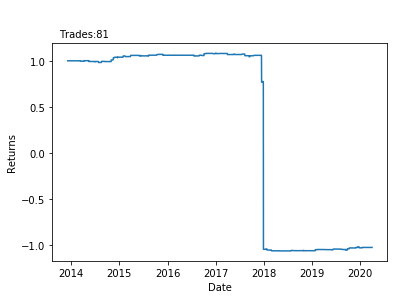

In [9]:
plt.plot((df['Str_ret']+1).cumprod())
plt.figtext(0.14,0.9,s='\n\nTrades:%i'%trades)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()